<a href="https://colab.research.google.com/github/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/blob/main/Data_Collection_From_Twitter_with_Lexicon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PySastrawi==1.2.0
!pip install snscrape==0.5.0.20230113
!pip install nltk==3.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import some libraries

import pandas as pd
from datetime import timedelta, datetime
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import snscrape.modules.twitter as sntwitter

import datetime as dt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Created a list to append all tweet attributes(data)
attributes_container = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('ikn lang:id').get_items()):  
    if i>50:
        break
    attributes_container.append([tweet.date, tweet.user.username,tweet.rawContent, tweet.sourceLabel])
    
# Creating a dataframe from the tweets list above 
tweets = pd.DataFrame(attributes_container, columns=["tweetcreatedts", "username", "tweet", "source"])
tweets.to_csv("tweet_data.csv")

In [ ]:
tweets = pd.read_csv('tweet_data.csv')
tweets.sample(5)

,Unnamed: 0,tweetcreatedts,username,tweet,source
29,29,2023-03-04 02:30:46+00:00,Diarybidadari1,Proyek PLTG Sambera di IKN terancam mangkrak pdhl itu penting bgt buat aktivitas masyarakat sekitar #PLTGSamberaMangkrak https://t.co/O3i6wN3hlQ,Twitter Web App
11,11,2023-03-04 02:33:38+00:00,Adiba_jia,"sungguh Dalam paparannya, Dudung mengatakan sebagai alat negara di bidang pertahanan, TNI AD harus dapat memberikan perlindungan dan keamanan IKN (Ibu Kota Negara).\n\n@NgopiBareng_DAR\n\nKSAD Jenderal Dudung Abdurachman\nAngkatan Darat Di Hati Rakyat\nTulus Utamakan Rakyat https://t.co/r24WisuQ01",Twitter Web App
10,10,2023-03-04 02:34:45+00:00,sushiitr4shh,6000 Kepala desa se-Indonesia kompak dukung IKN Nusantara #KotaDuniaUntukSemua #IKNSejahterakanIndonesia https://t.co/dQJWrTznGF,Twitter Web App
22,22,2023-03-04 02:31:25+00:00,Maulanaa_ramdan,tidak lupa juga Jenderal TNI Dudung Abdurachman menjadi keynote speaker pada seminar nasional “Pembangunan Kodam IKN Satuan Operasional Pengaman Ibu Kota Negara\n\n@NgopiBareng_DAR\n\nKSAD Jenderal Dudung Abdurachman\nAngkatan Darat Di Hati Rakyat\nTulus Utamakan Rakyat https://t.co/L0qKc9wqNx,Twitter Web App
2,2,2023-03-04 02:36:31+00:00,KaharSajah,"Dikatakan Kasad Dudung AR, pembangunan Kodam Khusus ini didesain menggunakan smart defense agar selaras dengan IKN yang berbasis sistem pemerintahan yang serba modern.\n\n@Ngopibareng_DAR \n\nKSAD Jenderal Dudung Abdurachman\nAngkatan Darat Di Hati Rakyat\nTulus Utamakan Rakyat https://t.co/uRkeTMMwwk",Twitter for Android


In [ ]:
# Some functions for preprocessing text
def cleaningText(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # remove mentions
    tweet = re.sub(r'#[A-Za-z0-9]+', '', tweet) # remove hashtag
    tweet = re.sub(r'RT[\s]', '', tweet) # remove RT
    tweet = re.sub(r"http\S+", '', tweet) # remove link
    tweet = re.sub(r'[0-9]+', '', tweet) # remove numbers
    tweet = tweet.replace('\n', ' ') # replace new line into space
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    tweet = tweet.strip(' ') # remove characters space from both left and right text
    return tweet

def casefoldingText(tweet): # Converting all the characters in a text into lower case
    tweet = tweet.lower() 
    return tweet

key_norm = pd.read_csv('https://raw.githubusercontent.com/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/main/Dataset/kamus-slang-ind.csv', encoding='ISO-8859-1')
def text_normalize(tweet):
    tweet = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
    if (key_norm['singkat'] == word).any()
    else word for word in tweet.split()
    ])
    return tweet

def tokenizingText(tweet): # Tokenizing or splitting a string, text into a list of tokens
    tweet = word_tokenize(tweet) 
    return tweet

def filteringText(tweet): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in tweet:
        if txt not in listStopwords:
            filtered.append(txt)
    tweet = filtered 
    return tweet

def stemmingText(tweet): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tweet = [stemmer.stem(word) for word in tweet]
    return tweet

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
# Preprocessing tweets data
tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets['text_clean'] = tweets['text_clean'].apply(text_normalize)
tweets.drop(['tweet'], axis = 1, inplace = True)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)
tweets.drop_duplicates(subset = 'text_clean', inplace = True)

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)
lexicon_positive = {}
positive = 'https://raw.githubusercontent.com/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/main/Dataset/lexicon_positive.csv'
positive  = pd.read_csv(positive )
for index, row in positive.iterrows():
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = {}
negative = 'https://raw.githubusercontent.com/FaddliLWibowo/Twitter-Sentiment-Analysis-with-Streamlit/main/Dataset/lexicon_negative.csv'
negative  = pd.read_csv(negative )
for index, row in negative.iterrows():
    lexicon_negative[row[0]] = int(row[1])
               
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positif'
    elif (score < 0):
        polarity = 'negatif'
    else:
        polarity = 'positif' # dapat diganti dengan netral
    return score, polarity

In [ ]:
# Results from determine sentiment polarity of tweets
results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]

In [ ]:
print(tweets['polarity'].value_counts())

positif    29
negatif    22
Name: polarity, dtype: int64


In [ ]:
# Export to csv file
tweets.to_excel(r'tweets_data_clean_with_polarity.xlsx', index = False, header = True, index_label=None)
tweets.head(10)

,Unnamed: 0,tweetcreatedts,username,source,text_clean,text_preprocessed,polarity_score,polarity
0,0,2023-03-04 02:36:51+00:00,FatiyahM,Twitter for iPhone,semoga secepatnya ada solusinya ini agar tidak menghambat pasokan listrik di ikn,"[moga, cepat, solusi, hambat, pasok, listrik, ikn]",0,positif
1,1,2023-03-04 02:36:33+00:00,Anapradista_11,Twitter Web App,jangan sampai mangkak dong kan kasihan ikn 😫😫😫,"[mangkak, kasihan, ikn, ]",1,positif
2,2,2023-03-04 02:36:31+00:00,KaharSajah,Twitter for Android,dikatakan kasad dudung ar pembangunan kodam khusus ini didesain menggunakan pintar defense agar selaras dengan ikn yang berbasis sistem pemerintahan yang serba modern dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,"[kasad, dudung, ar, bangun, kodam, khusus, desain, pintar, defense, selaras, ikn, bas, sistem, perintah, serba, modern, dar, ksad, jenderal, dudung, abdurachman, angkat, darat, hati, rakyat, tulus, utama, rakyat]",12,positif
3,3,2023-03-04 02:36:16+00:00,AibrahS,Twitter Web App,jangan sampai akan berdampak pada keberlangsungan ikn semoga semua ada jalan keluarnya amin,"[dampak, langsung, ikn, moga, jalan, keluar, amin]",-2,negatif
4,4,2023-03-04 02:35:38+00:00,JendelaindoNews,Twitter for Android,peringatan kemerdekaan indonesia di diyakini bisa berlangsung di ikn,"[ingat, merdeka, indonesia, yakin, ikn]",2,positif
5,5,2023-03-04 02:35:27+00:00,gyalate,Twitter for Android,semoga secepatnya ada solusinya agar tidak menghambat pasokan listrik di ikn mari kita doakan bersamasama,"[moga, cepat, solusi, hambat, pasok, listrik, ikn, mari, doa, bersamasama]",3,positif
6,6,2023-03-04 02:35:17+00:00,sushiitr4shh,Twitter Web App,pemerintah siapkan persen wilayah di ikn nusantara sebagai hutan tropis,"[perintah, siap, persen, wilayah, ikn, nusantara, hutan, tropis]",6,positif
7,7,2023-03-04 02:35:07+00:00,sushiitr4shh,Twitter Web App,pembangunan ikn nusantara membawa peluang pertumbuhan ekonomi,"[bangun, ikn, nusantara, bawa, peluang, tumbuh, ekonomi]",-2,negatif
8,8,2023-03-04 02:34:59+00:00,sushiitr4shh,Twitter Web App,cendekiawan daya sebut ikn nusantara adalah pemerataan pembangunan,"[cendekiawan, daya, ikn, nusantara, perata, bangun]",2,positif
9,9,2023-03-04 02:34:52+00:00,sushiitr4shh,Twitter Web App,luas wilayah penyerap karbon di ikn nusantara kauh lebih besar,"[luas, wilayah, serap, karbon, ikn, nusantara, kauh]",3,positif


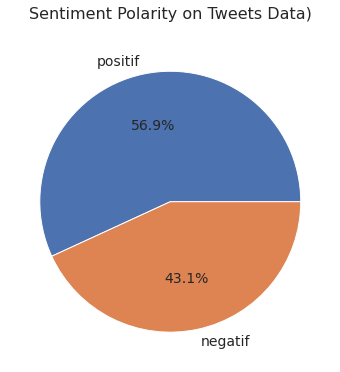

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data)', fontsize = 16, pad = 20)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positif']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,dikatakan kasad dudung ar pembangunan kodam khusus ini didesain menggunakan pintar defense agar selaras dengan ikn yang berbasis sistem pemerintahan yang serba modern dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,12,positif
2,kodam khusus ini akan dibangun secara simultan sampai dalam tahapan menyesuaikan dengan pembangunan ikn sampai tahun pungkas kasad dudung ar dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,9,positif
3,kali ini jenderal tentara nasional indonesia dudung abdurachman menjadi keynote speaker pada seminar nasional “pembangunan kodam ikn satuan operasional pengaman ibu kota negara dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,8,positif
4,karenanya jenderal tentara nasional indonesia dudung abdurachman menjadi keynote speaker pada seminar nasional “pembangunan kodam ikn satuan operasional pengaman ibu kota negara dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,8,positif
5,adapun jenderal tentara nasional indonesia dudung abdurachman menjadi keynote speaker pada seminar nasional “pembangunan kodam ikn satuan operasional pengaman ibu kota negara dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,8,positif
6,sungguh hebat dalam paparannya dudung mengatakan sebagai alat negara di bidang pertahanan tentara nasional indonesia ada harus dapat memberikan perlindungan dan keamanan ikn ibu kota negara dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,7,positif
7,sungguh dalam paparannya dudung mengatakan sebagai alat negara di bidang pertahanan tentara nasional indonesia ada harus dapat memberikan perlindungan dan keamanan ikn ibu kota negara dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,7,positif
8,pemerintah siapkan persen wilayah di ikn nusantara sebagai hutan tropis,6,positif
9,tidak lupa juga jenderal tentara nasional indonesia dudung abdurachman menjadi keynote speaker pada seminar nasional “pembangunan kodam ikn satuan operasional pengaman ibu kota negara dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,6,positif
10,luar biasa dalam paparannya dudung mengatakan sebagai alat negara di bidang pertahanan tentara nasional indonesia ada harus dapat memberikan perlindungan dan keamanan ikn ibu kota negara dar ksad jenderal dudung abdurachman angkatan darat di hati rakyat tulus utamakan rakyat,4,positif


In [ ]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negatif']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,bahaya sih pasokan listrik di ikn bisa terhambat semoga ada jalan keluarnya ya,-11,negatif
2,listrik itu kebutuhan yang vital buat ikn semua pihak terkait harus mengambil langkah cepat supaya tidak menjadikan,-10,negatif
3,berhentinya pembangunan pltg sambera akan mempengaruhi ekonomi dan pasokan listrik masyarakat di sekitar ikn semoga saja ada titik terang dan berlanjut pembangunannya agar wilayah di sekitar ikn mendapat pasokan listrik yang cukup,-9,negatif
4,ali sama dong seperti sekarang ekonomi lagi tidak beres tapi malah memaksa kereta cepat sama ikn,-8,negatif
5,aduh jangan sampai benaran mangkrak bakal ganggu pasokan listrik di ikn,-8,negatif
6,proyek ikn jangan sampai terhenti deh akibat ayo ambil langkah segera buat mengatasi hal ini,-7,negatif
7,sayang banget kalau sampai mangkrak soalnya ini jadi kunci pembangunan ikn juga kebutuhan listrik warga nanti terganggu,-6,negatif
8,bagaimana nasib warga sekitar ikn kalau benaran berhenti keberadaan pltg ini sangat penting untuk aktivitas dan mobilitas mereka,-5,negatif
9,ini serius sama di stop padahal pltg sambera itu penting banget buat aktivitas masyarakat sekitar ikn jangan biarkan,-5,negatif
10,aduh kalau bisa berdampak banget nih buat aktivitas warga disekitar ikn harus diusut sih ini,-5,negatif


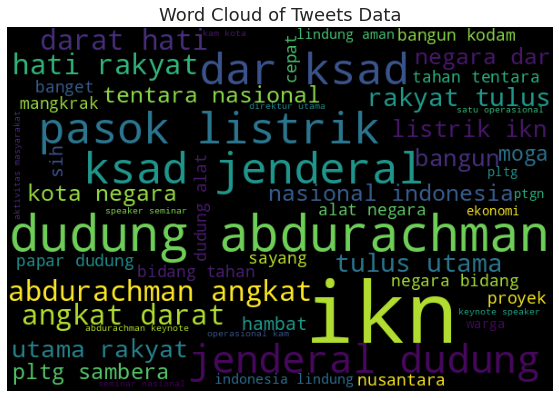

In [ ]:
# Visualize word cloud
list_words=''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [ ]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

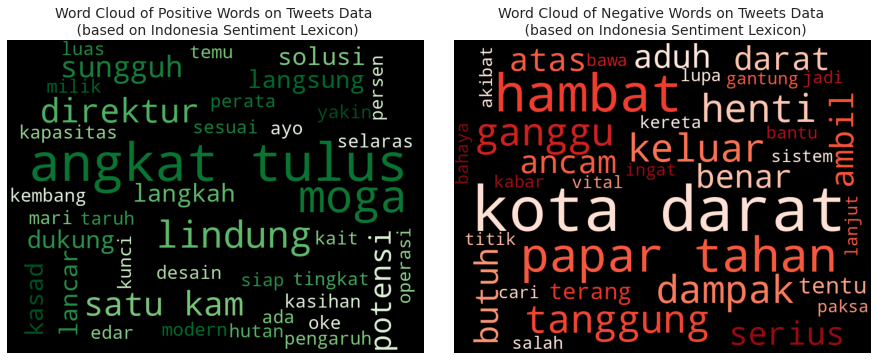

In [ ]:
# Visualize positive and negative word cloud

sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()